<a href="https://colab.research.google.com/github/faiz983735-lab/Sentiment-Analyzer-AI/blob/main/SentimentAnalyzerAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Core libraries
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Text cleaning
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import joblib # Ensure joblib is imported

# Download NLP resources
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt_tab', quiet=True)
# Hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
pd.set_option('display.max_columns', None)   # for display all columns
pd.set_option('display.max_rows', None)   # for display all rows
pd.set_option('display.max_colwidth', None)  # For display the complete data of each row

In [4]:
df.shape

(50000, 2)

In [5]:
from nltk.tokenize import sent_tokenize

In [6]:
# create a new column no of sentences in each row
df['sentence_count'] = df['review'].apply(lambda x: len(sent_tokenize(x)))

df.head()

,review,sentiment,sentence_count
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,10
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,7
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive,4
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become 

In [7]:
# Unique values of sentiment
print(f"The unique values in sentiment {df['sentiment'].unique()}")

The unique values in sentiment ['positive' 'negative']


Sentiment Distribution: sentiment
positive    25000
negative    25000
Name: count, dtype: int64


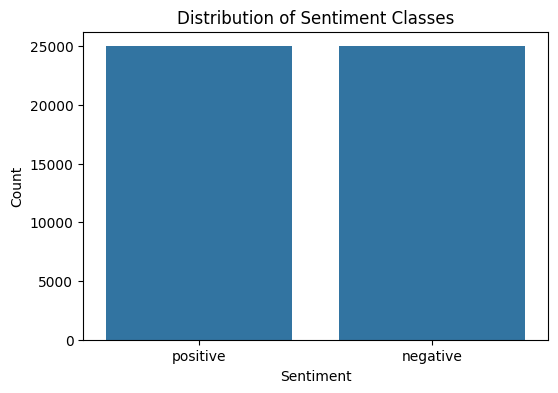

In [8]:
# Check the value counts of sentiment column
print(f"Sentiment Distribution: {df['sentiment'].value_counts()}")

# count  plot of sentiment classes
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'])
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [9]:
# check the null values
df.isnull().sum()

,0
review,0
sentiment,0
sentence_count,0


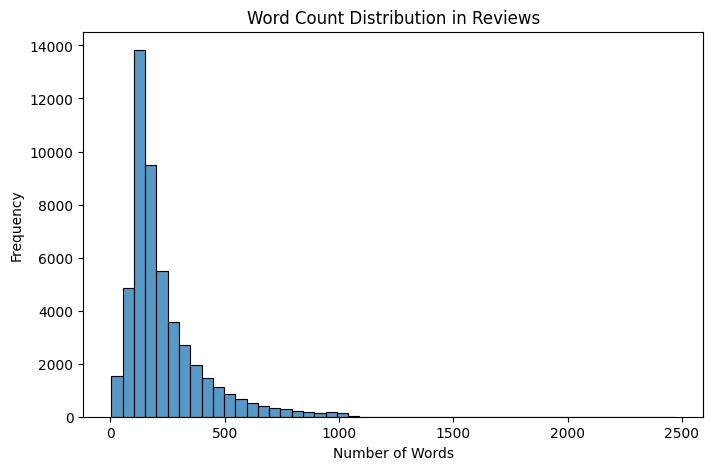

In [10]:
# Word count distribution
df['word_count'] = df['review'].apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(df['word_count'], bins=50)
plt.title("Word Count Distribution in Reviews")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

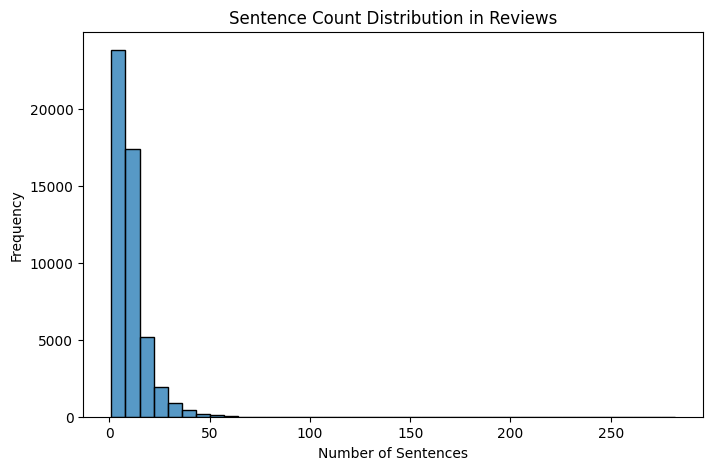

In [11]:
# Sentence count distribution
plt.figure(figsize=(8,5))
sns.histplot(df['sentence_count'], bins=40)
plt.title("Sentence Count Distribution in Reviews")
plt.xlabel("Number of Sentences")
plt.ylabel("Frequency")
plt.show()

3. Text Preprocessing Pipeline (functions) We will:

1.Remove HTML tags

2.Lowercase

3.Remove URLs and user mentions

4.Remove punctuation and digits

5.Tokenize

6.Remove stopwords

7.Lemmatize

In [12]:
# Remove html tags
df['clean_reviews'] = df['review'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Convert text to lowercase
df['clean_reviews'] = df['clean_reviews'].str.lower()

# Remove punctuation
import string
df['clean_reviews'] = df['clean_reviews'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))


# remove URLs
df['clean_reviews'] = df['clean_reviews'].apply(
    lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x)
)

# Remove numbers
df['clean_reviews'] = df['clean_reviews'].apply(lambda x: re.sub(r'\d+', '', x))

# Remove extra spaces
df['clean_reviews'] = df['clean_reviews'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Remove stop words
stop = set(stopwords.words('english'))

df['clean_reviews'] = df['clean_reviews'].apply(
    lambda x: ' '.join([word for word in x.split() if word not in stop])
)

# Limitization

lemm = WordNetLemmatizer()

df['clean_reviews'] = df['clean_reviews'].apply(
    lambda x: ' '.join([lemm.lemmatize(word) for word in x.split()])
)

In [13]:
df.head(2)

,review,sentiment,sentence_count,word_count,clean_reviews
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive,10,307,one reviewer mentioned watching oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable uncomfortable viewingthats get touch darker side
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive,7,162,wonderful litt

In [14]:
#split the data into train-test-split
X_train, X_test, y_train, y_test = train_test_split(df['clean_reviews'], df['sentiment'], test_size=0.2, random_state=42)

In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
# call the model
model_lr = LogisticRegression(max_iter=300)

# Train the model
model_lr.fit(X_train_vec, y_train)

# Predict the model
preds = model_lr.predict(X_test_vec)

**Evaluate the Model-1(Logistic Regression)**

In [17]:
accuracy_model = accuracy_score(y_test, preds)

In [18]:
accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds, pos_label='positive')
recall = recall_score(y_test, preds, pos_label='positive')
f1 = f1_score(y_test, preds, pos_label='positive')
classification = classification_report(y_test, preds)

print("Accuracy = ", accuracy)
print("Recall_Score = ", recall)
print("F1_Score = ", f1)
print("Precision_Score = ", precision)
print("Classification_report = ", classification)

Accuracy =  0.8854
Recall_Score =  0.8983925382020242
F1_Score =  0.8876470588235295
Precision_Score =  0.8771555900019377
Classification_report =                precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



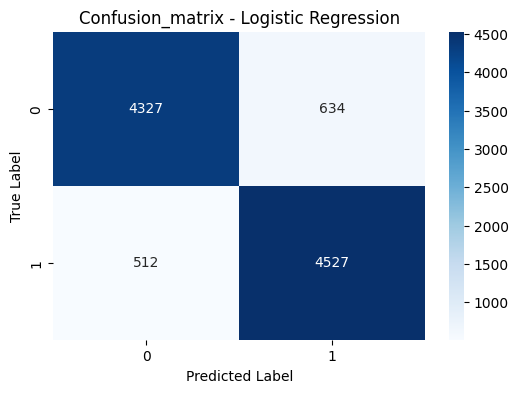

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, preds)

# let's plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion_matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [20]:
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
joblib.dump(model_lr, "lr_model.joblib")

['lr_model.joblib']

**TRAIN LSTM MODEL**

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [22]:
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

In [23]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [24]:
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

In [25]:
## Build the model
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training the Mode**

In [27]:
preds_lstm=model.fit(X_train_pad, y_train_encoded, epochs=3, batch_size=64, validation_split=0.2)

Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 211s 406ms/step - accuracy: 0.7560 - loss: 0.4897 - val_accuracy: 0.8709 - val_loss: 0.3166
Epoch 2/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 405ms/step - accuracy: 0.9059 - loss: 0.2519 - val_accuracy: 0.8706 - val_loss: 0.3446
Epoch 3/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 203s 407ms/step - accuracy: 0.9351 - loss: 0.1788 - val_accuracy: 0.8683 - val_loss: 0.3611


In [28]:
y_pred_lstm_prob = model.predict(X_test_pad)
y_pred_lstm = (y_pred_lstm_prob > 0.5).astype(int)
accuracy_model_lstm = accuracy_score(y_test_encoded, y_pred_lstm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 118ms/step


In [29]:
accuracy_lstm = accuracy_score(y_test_encoded, y_pred_lstm)
precision_lstm = precision_score(y_test_encoded, y_pred_lstm)
recall_lstm = recall_score(y_test_encoded, y_pred_lstm)
f1_lstm = f1_score(y_test_encoded, y_pred_lstm)
classification = classification_report(y_test_encoded, y_pred_lstm)

print("Accuracy = ", accuracy_lstm)
print("Recall_Score = ", recall_lstm)
print("F1_Score = ", f1_lstm)
print("Precision_Score = ", precision_lstm)
print("Classification_report = ", classification)

Accuracy =  0.8763
Recall_Score =  0.8926374280611232
F1_Score =  0.8791165836020717
Precision_Score =  0.8659992298806315
Classification_report =                precision    recall  f1-score   support

           0       0.89      0.86      0.87      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



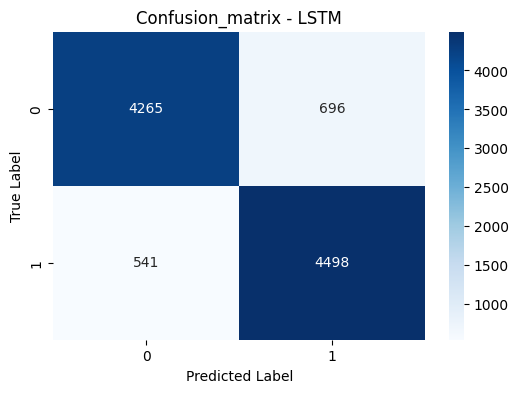

In [30]:
# Confusion Matrix
cm = confusion_matrix(y_test_encoded, y_pred_lstm)

# let's plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion_matrix - LSTM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [31]:
model.save("lstm_model.keras")


**Create FastAPI App (app.py)**

In [32]:
%%writefile app.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

# Load model & vectorizer
model = joblib.load("lr_model.joblib")
vectorizer = joblib.load("tfidf_vectorizer.joblib")

# Input schema
class PredictRequest(BaseModel):
    text: str

# Output schema
class PredictResponse(BaseModel):
    sentiment: str
    score: float

app = FastAPI(
    title="SentimentAnalyzerAI API",
  )

@app.get("/")
def home():
    return {"message": "ML Model FastAPI running successfully"}

@app.post("/predict", response_model=PredictResponse)
def predict(req: PredictRequest):
    text_vec = vectorizer.transform([req.text])
    pred = model.predict(text_vec)[0]
    score = model.predict_proba(text_vec)[0].max()

    sentiment = "Positive" if pred == 1 else "Negative"
    return PredictResponse(sentiment=sentiment, score=float(score))


Writing app.py


In [ ]:
!uvicorn app:app --reload

INFO:     Will watch for changes in these directories: ['/content']
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     Started reloader process [9729] using StatReload
INFO:     Started server process [9731]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
